<a href="https://colab.research.google.com/github/SidharthBhakth/Time-Series-Forecasting-with-TF2.x/blob/master/1_Simple_Autoregressive_(AR)_Model_in_TF_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Autoregressive (AR) Model in TF 2.x

Forecast a noisy sin wave with an autoregressive model using 10 lagged observations 

In [0]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

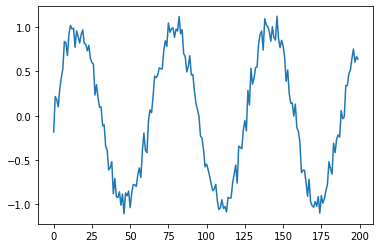

In [2]:
# Create a noisy sin wave
series = np.sin(0.1*np.arange(200)) + (np.random.randn(200)*0.1)

plt.plot(series)
plt.show()

In [3]:
# Build dataset to use 10 lagged observations to predict the next observation

X, y = [], []

for t in range(len(series)-10):
  X.append(series[t:t+10])
  y.append(series[t+10])

X = np.array(X).reshape(-1, 10)
y = np.array(y)

# No of samples
N = len(X)

print(X.shape, y.shape)

(190, 10) (190,)


In [0]:
# Build autoregressive linear model
i = Input(shape=X[0].shape)
x = Dense(1)(i)

model = Model(i, x)

# Compile
model.compile(optimizer=Adam(lr=0.1), loss='mse')

In [5]:
# Train the model
r = model.fit(X[:-N//2], y[:-N//2], validation_data=(X[-N//2:], y[-N//2:]), epochs=80, verbose=2)

Epoch 1/80
3/3 - 0s - loss: 7.9005 - val_loss: 2.5853
Epoch 2/80
3/3 - 0s - loss: 0.9147 - val_loss: 0.1841
Epoch 3/80
3/3 - 0s - loss: 0.7397 - val_loss: 1.3236
Epoch 4/80
3/3 - 0s - loss: 1.7947 - val_loss: 1.4242
Epoch 5/80
3/3 - 0s - loss: 1.2679 - val_loss: 0.5150
Epoch 6/80
3/3 - 0s - loss: 0.2794 - val_loss: 0.0408
Epoch 7/80
3/3 - 0s - loss: 0.1028 - val_loss: 0.2432
Epoch 8/80
3/3 - 0s - loss: 0.4279 - val_loss: 0.3784
Epoch 9/80
3/3 - 0s - loss: 0.4346 - val_loss: 0.1775
Epoch 10/80
3/3 - 0s - loss: 0.1473 - val_loss: 0.0289
Epoch 11/80
3/3 - 0s - loss: 0.0274 - val_loss: 0.0924
Epoch 12/80
3/3 - 0s - loss: 0.1100 - val_loss: 0.1442
Epoch 13/80
3/3 - 0s - loss: 0.1336 - val_loss: 0.0758
Epoch 14/80
3/3 - 0s - loss: 0.0554 - val_loss: 0.0231
Epoch 15/80
3/3 - 0s - loss: 0.0214 - val_loss: 0.0484
Epoch 16/80
3/3 - 0s - loss: 0.0469 - val_loss: 0.0641
Epoch 17/80
3/3 - 0s - loss: 0.0493 - val_loss: 0.0371
Epoch 18/80
3/3 - 0s - loss: 0.0233 - val_loss: 0.0211
Epoch 19/80
3/3 - 0

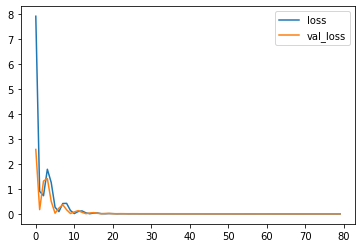

In [6]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# Forecast future predictions using self-predictions
y_test = y[-N//2:]
y_pred = []

# first test input
x = X[-N//2] # 1-D array of length 10

while len(y_pred) < len(y_test):
  p = model.predict(x.reshape(1,-1))[0,0] # 1x1 array (scalar)

  # Update predictions list
  y_pred.append(p)

  # Make new input using prediction
  x = np.roll(x, -1)
  x[-1] = p

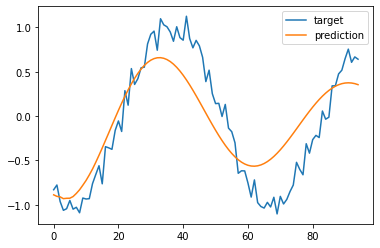

In [8]:
# Plot predicted vs actual output
plt.plot(y_test, label='target')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()


The model is able to learn the periodicty of the sequence but fails to learn the noise.

